In [10]:
!pip install -q scikit-plot

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

In [65]:
# Cargar dataset
df = pd.read_csv('winequality-red.csv')

# Visualizar filas iniciales
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de gráficos y estilo
plt.style.use('ggplot')  # Aplicar estilo 'ggplot' a los gráficos

# Ajustes generales de tamaño y tipografía
plt.rcParams.update({
    'figure.figsize': [6, 4],         # Tamaño de las figuras en pulgadas
    'font.size': 12,                  # Tamaño de la fuente
    'font.family': 'Palatino Linotype' # Tipo de letra
})

# Configurar paleta de colores para Seaborn
sns.set_palette('viridis')  # Paleta de colores 'viridis'

# Visualizar estadísticas descriptivas
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


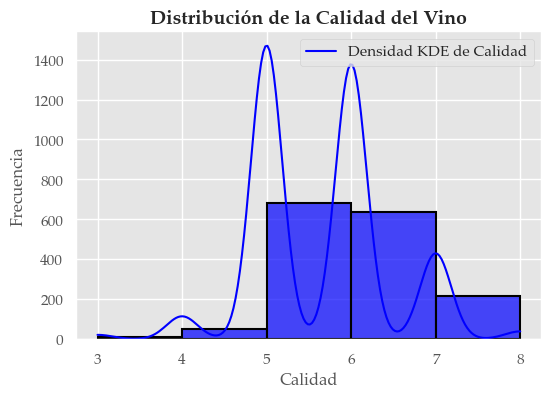

In [69]:
# Histograma de la variable 'quality' con estilo moderno
sns.histplot(df['quality'], kde=True, color='blue', bins=5, 
             alpha=0.7, linewidth=1.5, edgecolor='black')

# Configuración del gráfico
plt.title('Distribución de la Calidad del Vino', fontsize=14, fontweight='bold')
plt.xlabel('Calidad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

# Agregar una leyenda clara para la curva de densidad
plt.legend(['Densidad KDE de Calidad'], loc='upper right')

# Mostrar gráfico
plt.show()

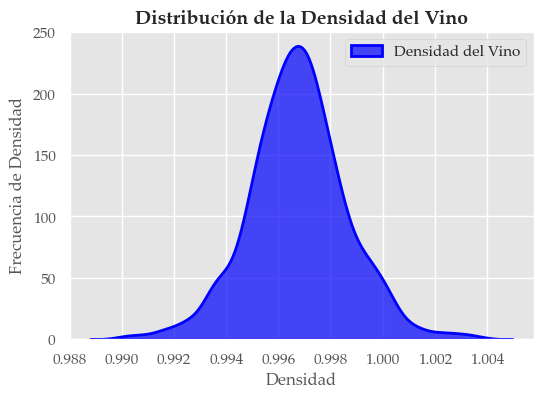

In [71]:
# Diagrama de densidad para la variable 'density'
sns.kdeplot(df['density'], fill=True, color='blue', alpha=0.7, linewidth=2)

# Configuración del gráfico
plt.title('Distribución de la Densidad del Vino', fontsize=14, fontweight='bold')
plt.xlabel('Densidad', fontsize=12)
plt.ylabel('Frecuencia de Densidad', fontsize=12)

# Leyenda descriptiva
plt.legend(['Densidad del Vino'], loc='upper right')

# Mostrar gráfico
plt.show()

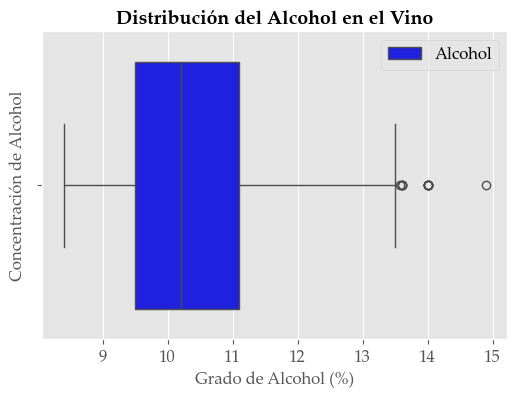

In [23]:
# Gráfico de caja para la variable 'alcohol'
sns.boxplot(x=df['alcohol'], color='blue')

# Configuración del gráfico
plt.title('Distribución del Alcohol en el Vino', fontsize=14, fontweight='bold')
plt.xlabel('Grado de Alcohol (%)', fontsize=12)
plt.ylabel('Concentración de Alcohol', fontsize=12)

# Leyenda opcional (si es necesaria)
plt.legend(['Alcohol'], loc='upper right')

# Mostrar gráfico
plt.show()

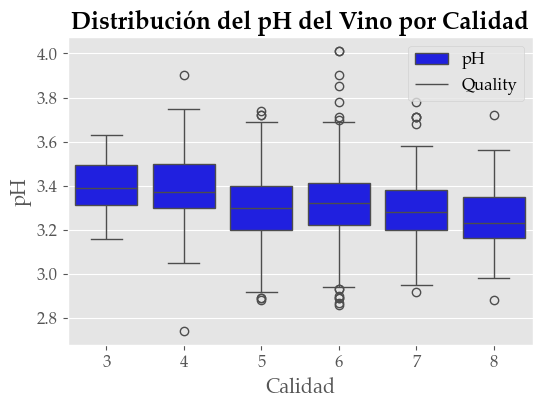

In [23]:
# Grafico de caja de la variable pH y calidad
sns.boxplot(x = df['quality'], y = df['pH'], color = 'blue')
# Título
plt.title('Distribución del pH del Vino por Calidad', fontweight = 'bold')
# Etiqueta eje x
plt.xlabel('Calidad')
# Etiqueta eje y
plt.ylabel('pH')
# Leyenda
plt.legend(['pH', 'Quality'])
# Mostar gráfico
plt.show()

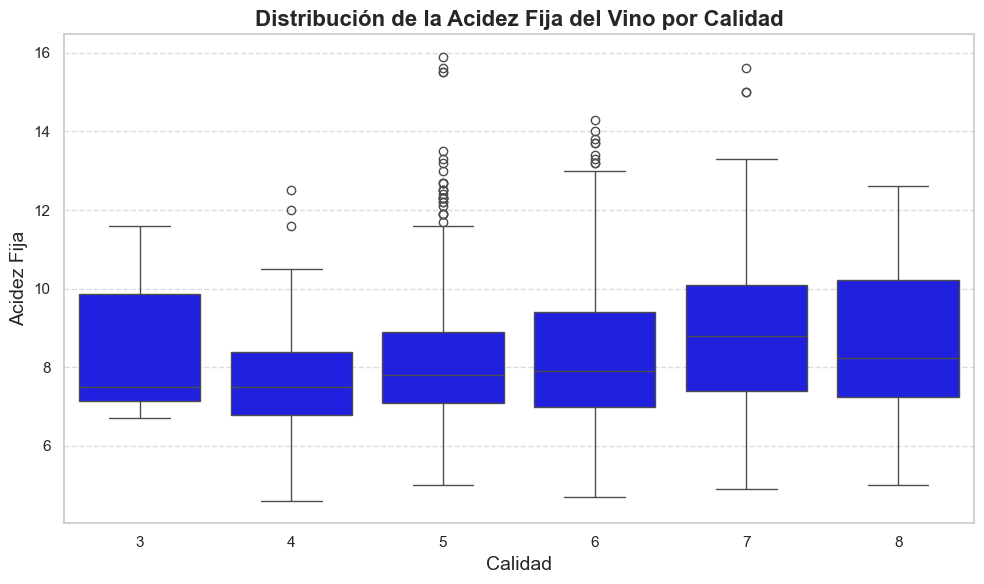

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el boxplot
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.boxplot(x='quality', y='fixed acidity', data=df, color='blue')

# Título
plt.title('Distribución de la Acidez Fija del Vino por Calidad', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Calidad', fontsize=14)
plt.ylabel('Acidez Fija', fontsize=14)

# Añadir cuadrícula
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()  # Ajustar el diseño
plt.show()


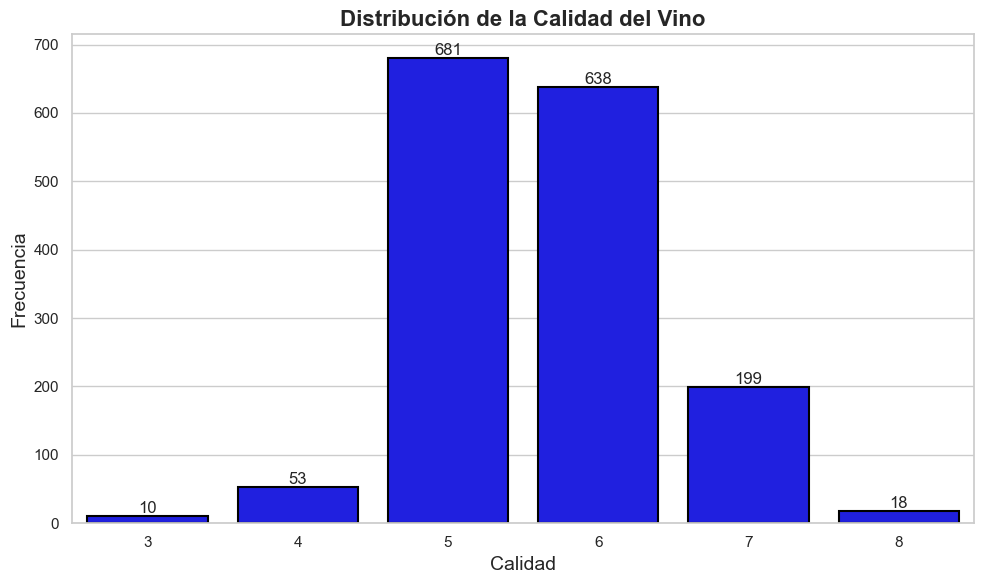

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
bar_plot = sns.countplot(x='quality', data=df, color='blue', edgecolor='black', linewidth=1.5)

# Título
plt.title('Distribución de la Calidad del Vino', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Calidad', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Añadir valores encima de las barras
for p in bar_plot.patches:
    bar_plot.annotate(f'{int(p.get_height())}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='bottom', fontsize=12)

# Ajustar el diseño
plt.tight_layout() 
plt.show()


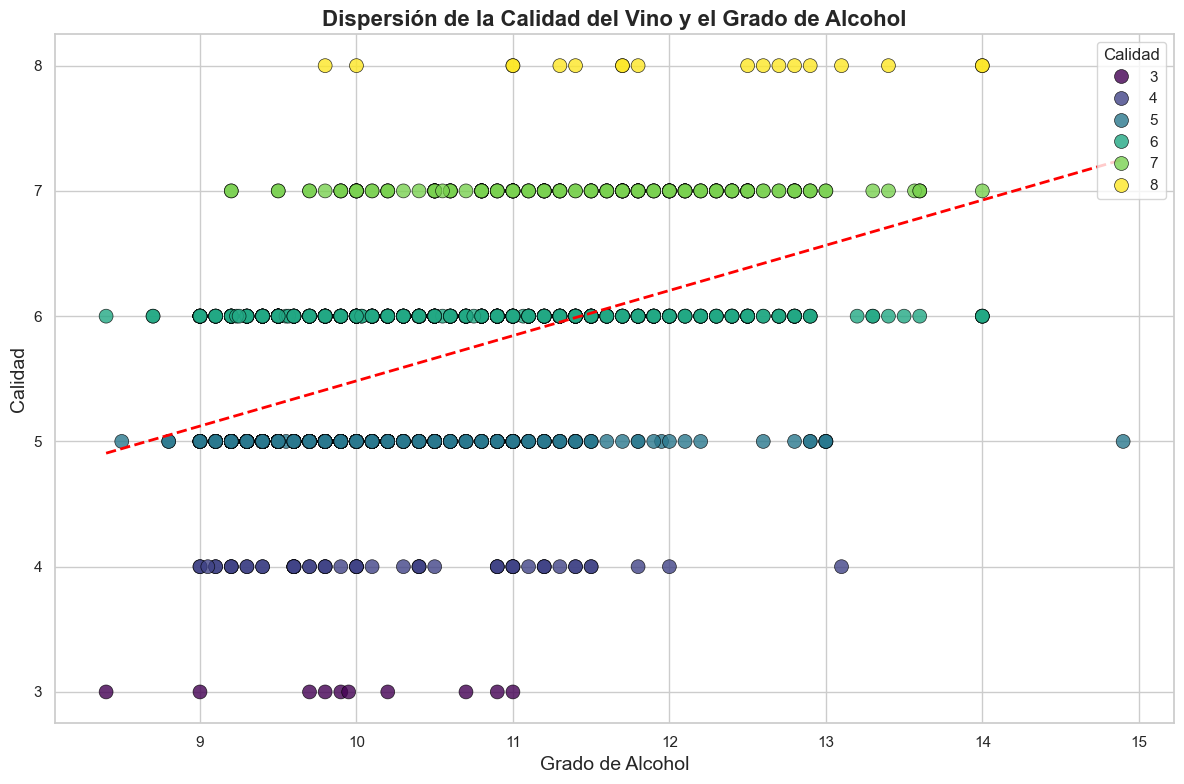

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de dispersión
plt.figure(figsize=(12, 8))  # Tamaño del gráfico

# Graficar los puntos de dispersión
scatter = sns.scatterplot(x=df['alcohol'], y=df['quality'], 
                          hue=df['quality'], palette='viridis', 
                          alpha=0.8, edgecolor='black', 
                          linewidth=0.5, s=100)

# Ajustar la línea de tendencia
sns.regplot(x='alcohol', y='quality', data=df, scatter=False, 
            color='red', line_kws={"linewidth": 2, "linestyle": "--"}, ci=None)

# Título
plt.title('Dispersión de la Calidad del Vino y el Grado de Alcohol', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Grado de Alcohol', fontsize=14)
plt.ylabel('Calidad', fontsize=14)

# Leyenda
plt.legend(title='Calidad', loc='upper right', frameon=True)

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


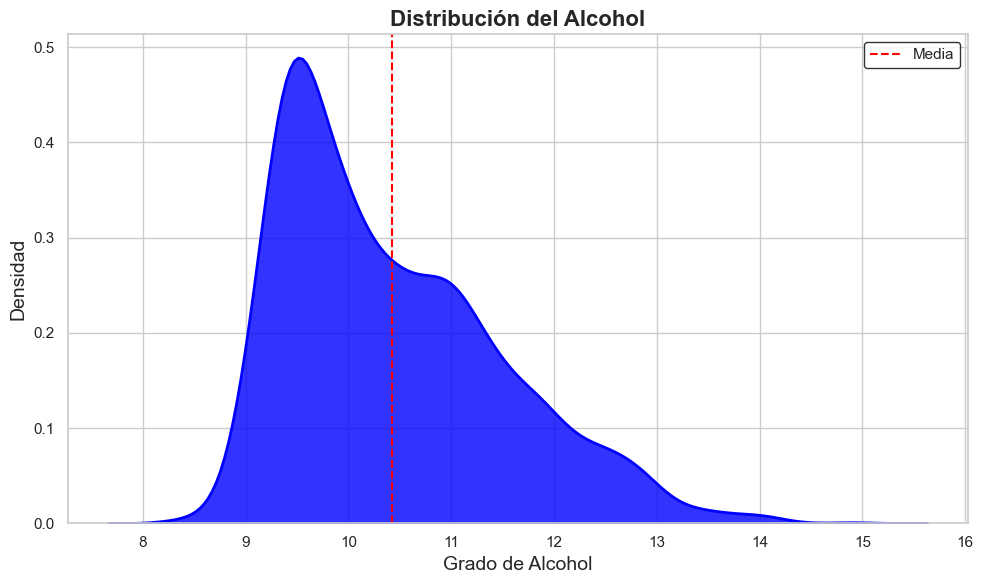

In [75]:
# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.kdeplot(data=df['alcohol'], fill=True, alpha=0.8, linewidth=2, color='blue')

# Añadir línea vertical para la media
mean_value = df['alcohol'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label='Media')

# Título
plt.title('Distribución del Alcohol', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Grado de Alcohol', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Leyenda con fondo de contraste (opcional)
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


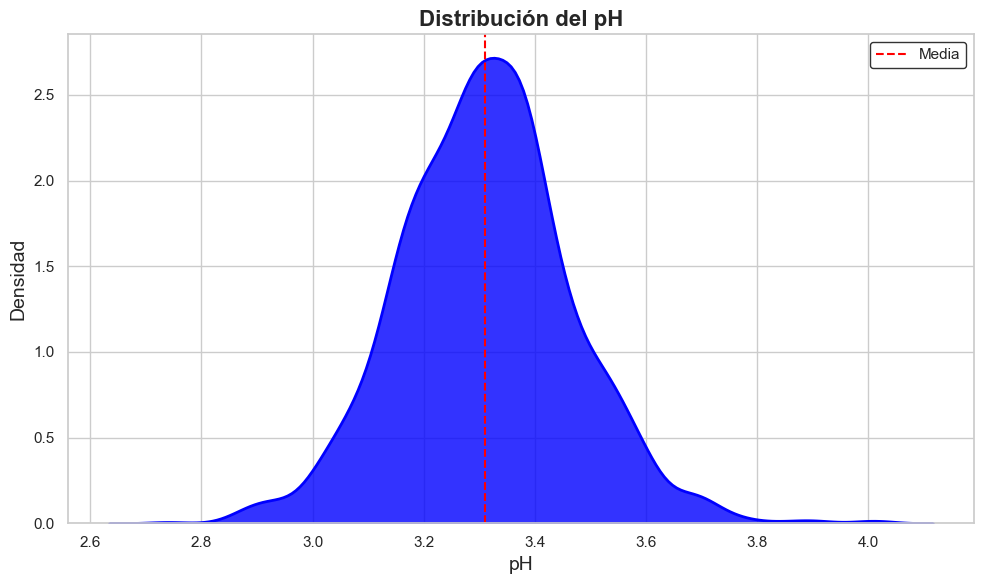

In [39]:
# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.kdeplot(data=df['pH'], fill=True, alpha=0.8, linewidth=2, color='blue')

# Añadir línea vertical para la media
mean_value = df['pH'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label='Media')

# Título
plt.title('Distribución del pH', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('pH', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Leyenda (opcional)
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


In [61]:
# Grafico de densidad de la variable fixed acidity
sns.kdeplot(data = df[['fixed acidity']], fill = True, alpha = 0.9, linewidth = 2, color = 'blue')
# Título
plt.title('Distribución de la Acidez Fija', fontweight = 'bold')
# Etiqueta eje x
plt.xlabel('Acidez Fija')
# Etiqueta eje y
plt.ylabel('Densidad')
# Leyenda con fondo de contraste
plt.legend(['Fixed Acidity'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')
# Mostar gráfico
plt.show()import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear una cuadrícula de gráficos de densidad
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Tamaño del gráfico

# Gráfico de densidad de la variable fixed acidity
sns.kdeplot(data=df['fixed acidity'], fill=True, alpha=0.9, linewidth=2, color='blue', ax=axs[0, 0])
mean_fixed_acidity = df['fixed acidity'].mean()
axs[0, 0].axvline(mean_fixed_acidity, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[0, 0].set_title('Distribución de la Acidez Fija', fontweight='bold', fontsize=14)
axs[0, 0].set_xlabel('Acidez Fija', fontsize=12)
axs[0, 0].set_ylabel('Densidad', fontsize=12)

# Gráfico de densidad de la variable residual sugar
sns.kdeplot(data=df['residual sugar'], fill=True, alpha=0.9, linewidth=2, color='green', ax=axs[0, 1])
mean_residual_sugar = df['residual sugar'].mean()
axs[0, 1].axvline(mean_residual_sugar, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[0, 1].set_title('Distribución del Azúcar Residual', fontweight='bold', fontsize=14)
axs[0, 1].set_xlabel('Azúcar Residual', fontsize=12)
axs[0, 1].set_ylabel('Densidad', fontsize=12)

# Gráfico de densidad de la variable citric acid
sns.kdeplot(data=df['citric acid'], fill=True, alpha=1.0, linewidth=2, color='orange', ax=axs[1, 0])
mean_citric_acid = df['citric acid'].mean()
axs[1, 0].axvline(mean_citric_acid, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[1, 0].set_title('Distribución del Ácido Cítrico', fontweight='bold', fontsize=14)
axs[1, 0].set_xlabel('Ácido Cítrico', fontsize=12)
axs[1, 0].set_ylabel('Densidad', fontsize=12)

# Gráfico de densidad de la variable chlorides  
sns.kdeplot(data=df['chlorides'], fill=True, alpha=1.0, linewidth=2, color='purple', ax=axs[1, 1])
mean_chlorides = df['chlorides'].mean()
axs[1, 1].axvline(mean_chlorides, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[1, 1].set_title('Distribución de los Cloruros', fontweight='bold', fontsize=14)
axs[1, 1].set_xlabel('Cloruros', fontsize=12)
axs[1, 1].set_ylabel('Densidad', fontsize=12)

# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()


SyntaxError: invalid syntax (478511097.py, line 12)

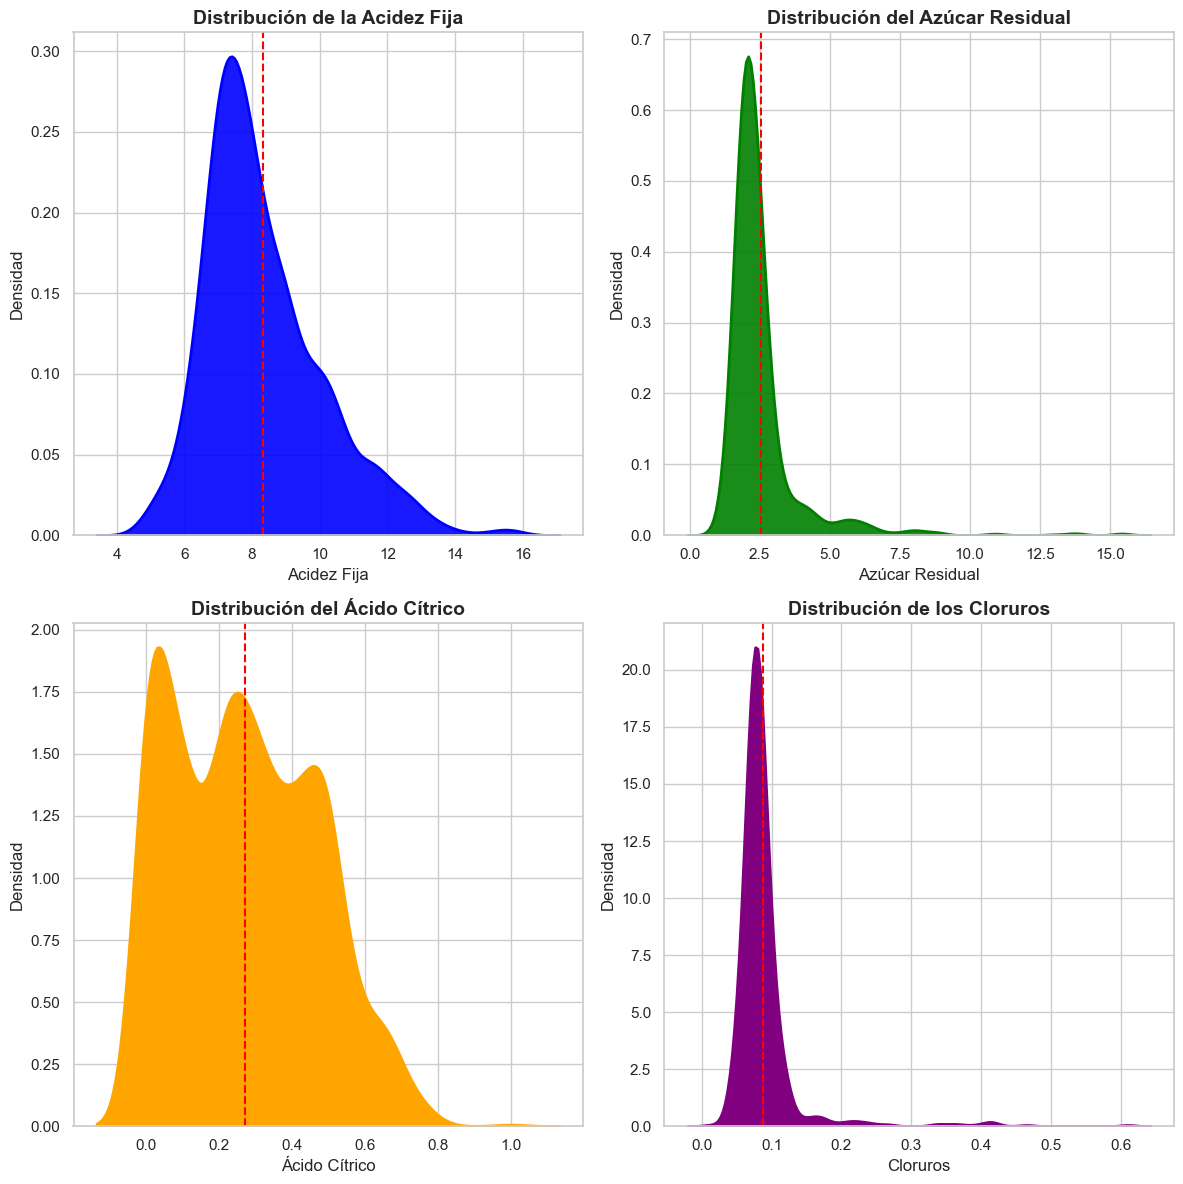

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear una cuadrícula de gráficos de densidad
fig, axs = plt.subplots(2, 2, figsize=(12, 12))  # Tamaño del gráfico

# Gráfico de densidad de la variable fixed acidity
sns.kdeplot(data=df['fixed acidity'], fill=True, alpha=0.9, linewidth=2, color='blue', ax=axs[0, 0])
mean_fixed_acidity = df['fixed acidity'].mean()
axs[0, 0].axvline(mean_fixed_acidity, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[0, 0].set_title('Distribución de la Acidez Fija', fontweight='bold', fontsize=14)
axs[0, 0].set_xlabel('Acidez Fija', fontsize=12)
axs[0, 0].set_ylabel('Densidad', fontsize=12)

# Gráfico de densidad de la variable residual sugar
sns.kdeplot(data=df['residual sugar'], fill=True, alpha=0.9, linewidth=2, color='green', ax=axs[0, 1])
mean_residual_sugar = df['residual sugar'].mean()
axs[0, 1].axvline(mean_residual_sugar, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[0, 1].set_title('Distribución del Azúcar Residual', fontweight='bold', fontsize=14)
axs[0, 1].set_xlabel('Azúcar Residual', fontsize=12)
axs[0, 1].set_ylabel('Densidad', fontsize=12)

# Gráfico de densidad de la variable citric acid
sns.kdeplot(data=df['citric acid'], fill=True, alpha=1.0, linewidth=2, color='orange', ax=axs[1, 0])
mean_citric_acid = df['citric acid'].mean()
axs[1, 0].axvline(mean_citric_acid, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[1, 0].set_title('Distribución del Ácido Cítrico', fontweight='bold', fontsize=14)
axs[1, 0].set_xlabel('Ácido Cítrico', fontsize=12)
axs[1, 0].set_ylabel('Densidad', fontsize=12)

# Gráfico de densidad de la variable chlorides  
sns.kdeplot(data=df['chlorides'], fill=True, alpha=1.0, linewidth=2, color='purple', ax=axs[1, 1])
mean_chlorides = df['chlorides'].mean()
axs[1, 1].axvline(mean_chlorides, color='red', linestyle='--', linewidth=1.5, label='Media')
axs[1, 1].set_title('Distribución de los Cloruros', fontweight='bold', fontsize=14)
axs[1, 1].set_xlabel('Cloruros', fontsize=12)
axs[1, 1].set_ylabel('Densidad', fontsize=12)

# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()


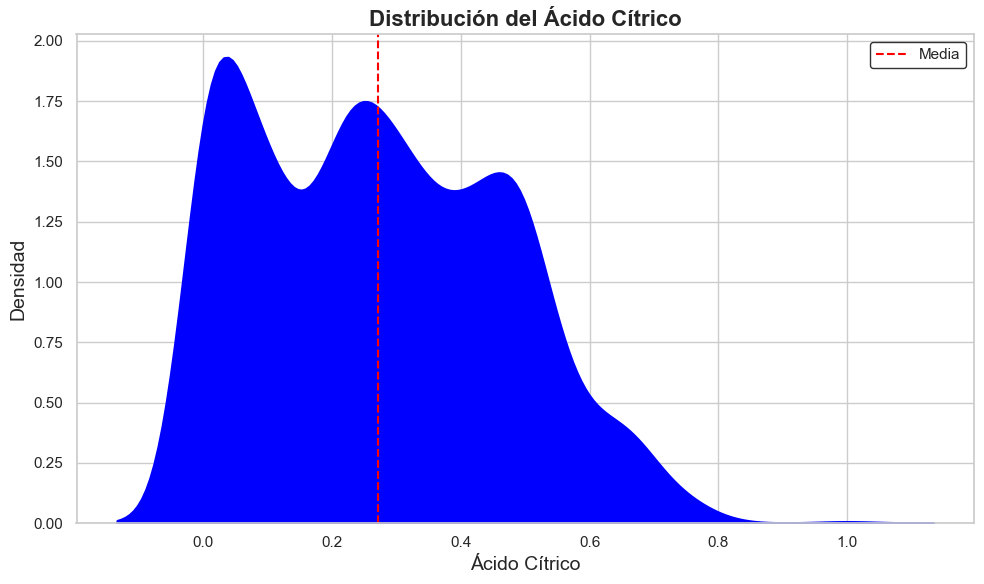

In [43]:
# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.kdeplot(data=df['citric acid'], fill=True, alpha=1.0, linewidth=2, color='blue')

# Añadir línea vertical para la media
mean_value = df['citric acid'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label='Media')

# Título
plt.title('Distribución del Ácido Cítrico', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Ácido Cítrico', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Leyenda (opcional)
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


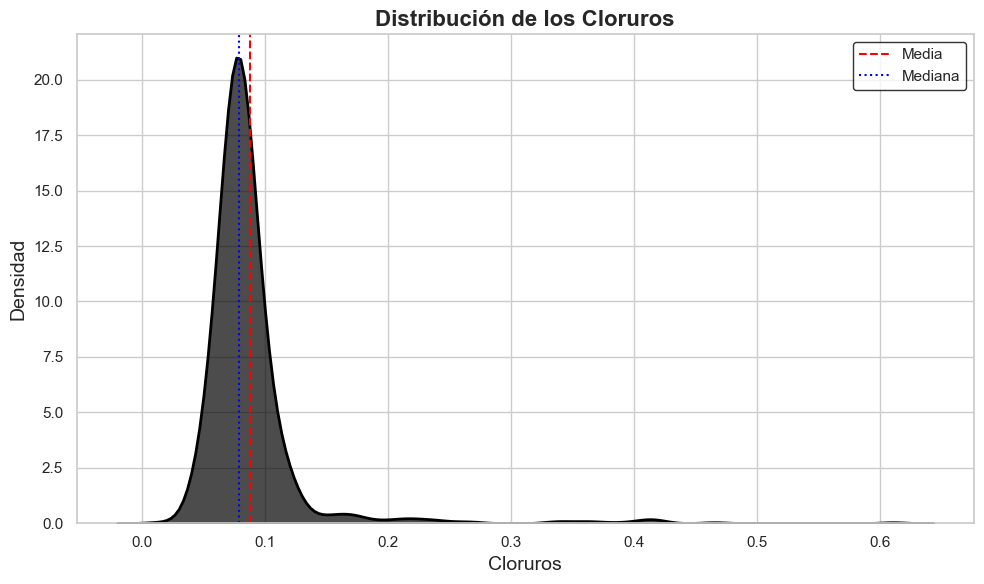

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.kdeplot(data=df['chlorides'], fill=True, alpha=0.7, linewidth=2, color='black')

# Añadir líneas verticales para la media y la mediana
mean_value = df['chlorides'].mean()
median_value = df['chlorides'].median()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label='Media')
plt.axvline(median_value, color='blue', linestyle=':', linewidth=1.5, label='Mediana')

# Título
plt.title('Distribución de los Cloruros', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Cloruros', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Leyenda con fondo de contraste
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


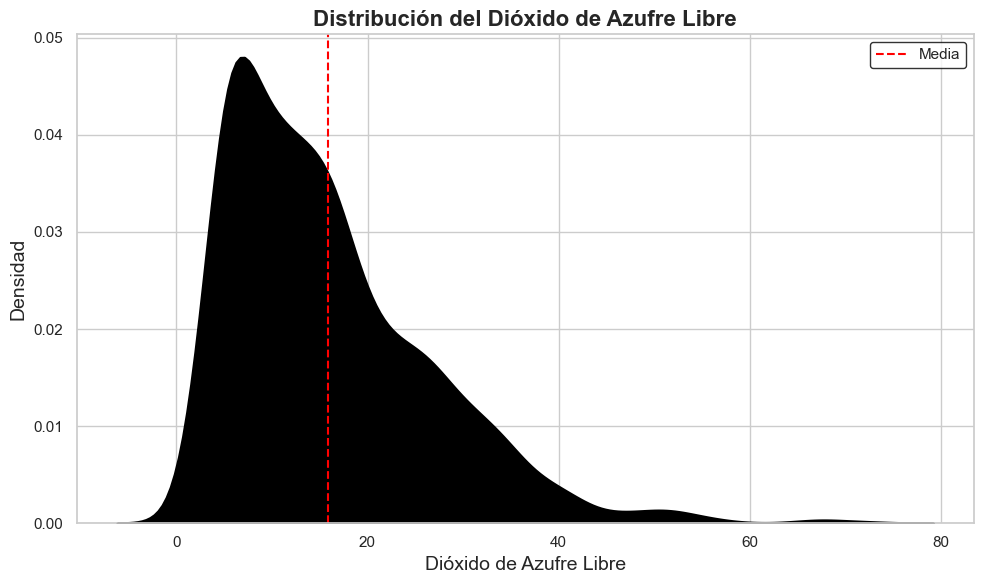

In [49]:
# Ajustar el estilo
sns.set(style="whitegrid")

# Crear el gráfico de densidad
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
sns.kdeplot(data=df['free sulfur dioxide'], fill=True, alpha=1.0, linewidth=2, color='black')

# Añadir línea vertical para la media
mean_value = df['free sulfur dioxide'].mean()
plt.axvline(mean_value, color='red', linestyle='--', linewidth=1.5, label='Media')

# Título
plt.title('Distribución del Dióxido de Azufre Libre', fontweight='bold', fontsize=16)

# Etiquetas de los ejes
plt.xlabel('Dióxido de Azufre Libre', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Leyenda (opcional)
plt.legend(loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()


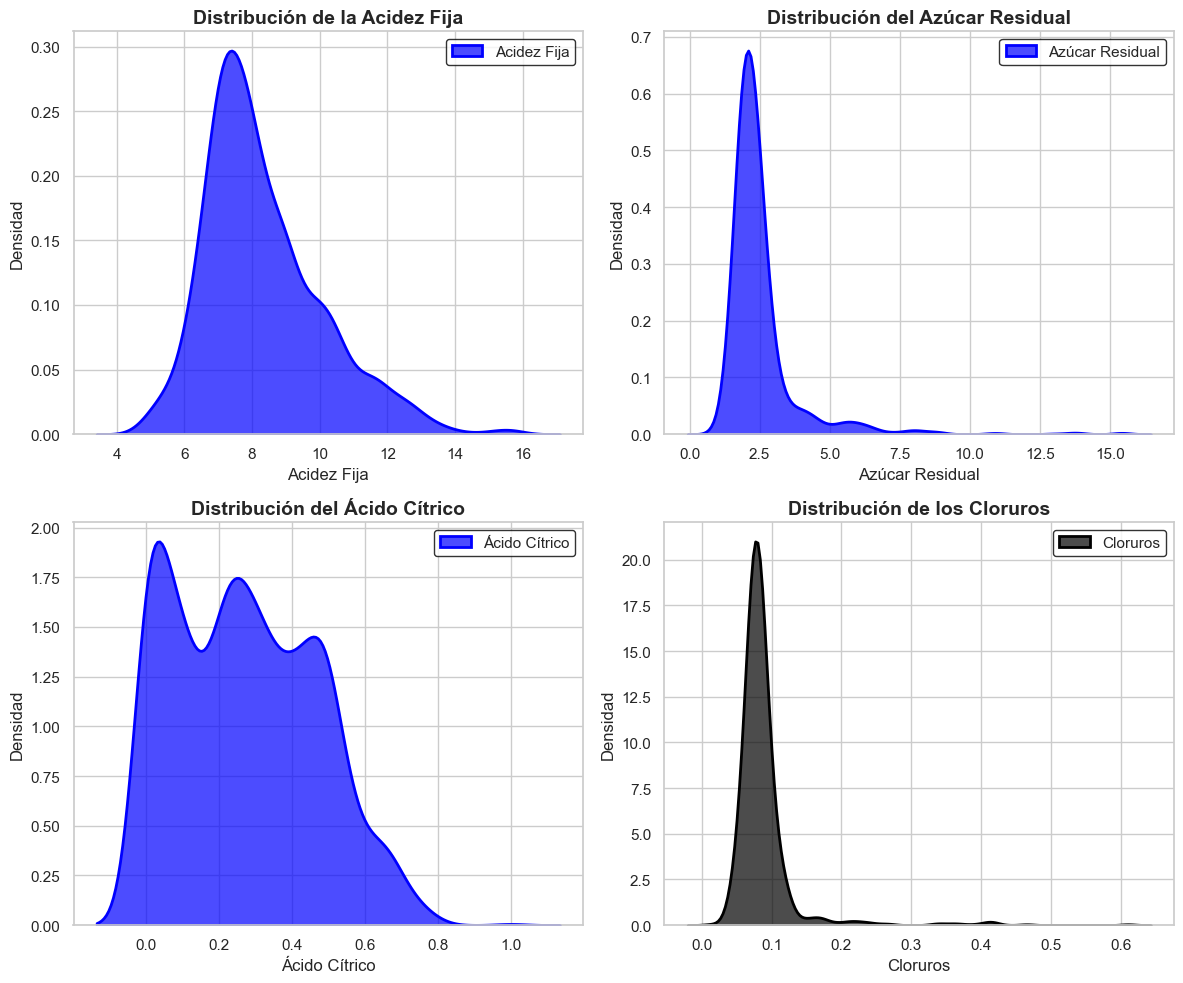

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ajustar el estilo
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))  # Tamaño del gráfico

# Gráfico de densidad de la variable fixed acidity
sns.kdeplot(data=df['fixed acidity'], fill=True, alpha=0.7, linewidth=2, color='blue', ax=axs[0, 0])
axs[0, 0].set_title('Distribución de la Acidez Fija', fontweight='bold', fontsize=14)
axs[0, 0].set_xlabel('Acidez Fija', fontsize=12)
axs[0, 0].set_ylabel('Densidad', fontsize=12)
axs[0, 0].legend(['Acidez Fija'], loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Gráfico de densidad de la variable residual sugar
sns.kdeplot(data=df['residual sugar'], fill=True, alpha=0.7, linewidth=2, color='blue', ax=axs[0, 1])
axs[0, 1].set_title('Distribución del Azúcar Residual', fontweight='bold', fontsize=14)
axs[0, 1].set_xlabel('Azúcar Residual', fontsize=12)
axs[0, 1].set_ylabel('Densidad', fontsize=12)
axs[0, 1].legend(['Azúcar Residual'], loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Gráfico de densidad de la variable citric acid
sns.kdeplot(data=df['citric acid'], fill=True, alpha=0.7, linewidth=2, color='blue', ax=axs[1, 0])
axs[1, 0].set_title('Distribución del Ácido Cítrico', fontweight='bold', fontsize=14)
axs[1, 0].set_xlabel('Ácido Cítrico', fontsize=12)
axs[1, 0].set_ylabel('Densidad', fontsize=12)
axs[1, 0].legend(['Ácido Cítrico'], loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Gráfico de densidad de la variable chlorides  
sns.kdeplot(data=df['chlorides'], fill=True, alpha=0.7, linewidth=2, color='black', ax=axs[1, 1])
axs[1, 1].set_title('Distribución de los Cloruros', fontweight='bold', fontsize=14)
axs[1, 1].set_xlabel('Cloruros', fontsize=12)
axs[1, 1].set_ylabel('Densidad', fontsize=12)
axs[1, 1].legend(['Cloruros'], loc='upper right', frameon=True, facecolor='white', edgecolor='black')

# Ajustar el espacio entre gráficos
plt.tight_layout()

# Mostrar gráfico
plt.show()


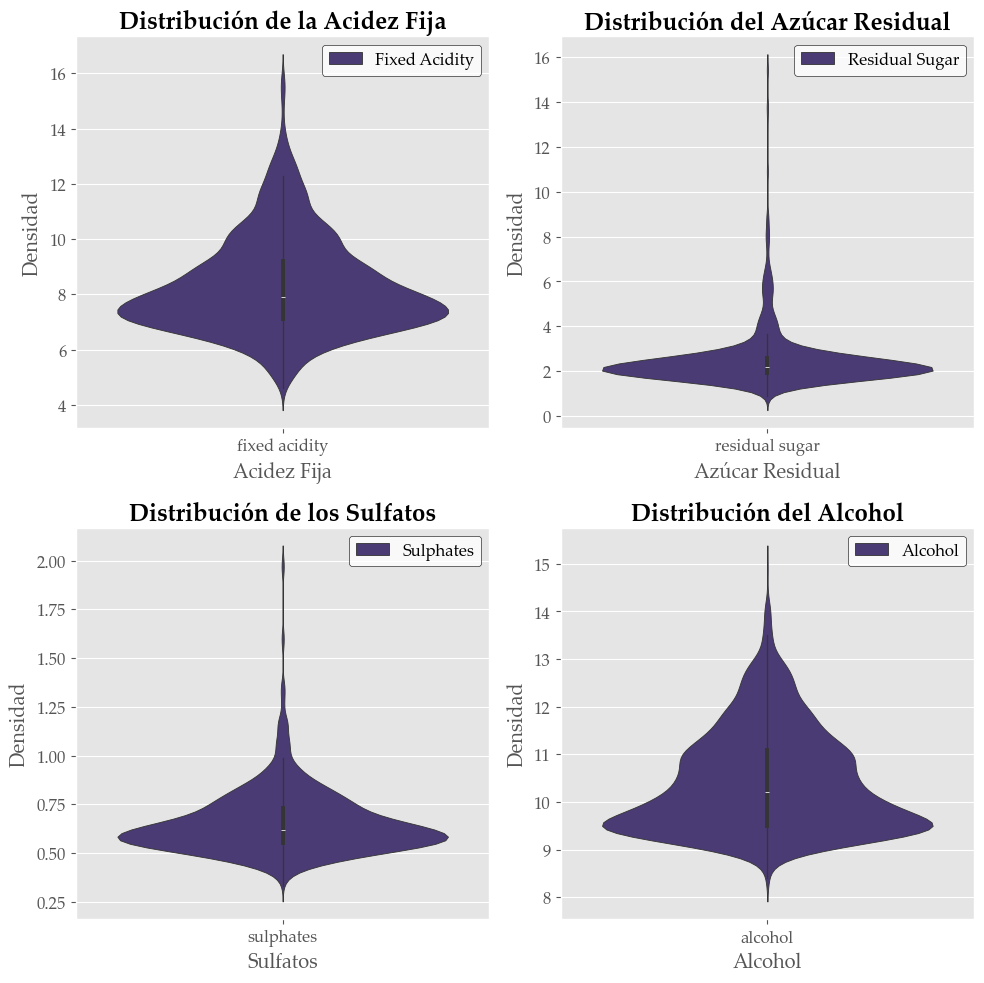

In [93]:
# 4 Graficos de violin en una cuadrícula 2x2
fig, axs = plt.subplots(2, 2, figsize = (10, 10))
# Grafico de violin de la variable fixed acidity
sns.violinplot(data = df[['fixed acidity']], ax = axs[0, 0])
# Título
axs[0, 0].set_title('Distribución de la Acidez Fija', fontweight = 'bold')
# Etiqueta eje x
axs[0, 0].set_xlabel('Acidez Fija')
# Etiqueta eje y
axs[0, 0].set_ylabel('Densidad')
# Leyenda con fondo de contraste
axs[0, 0].legend(['Fixed Acidity'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')

# Grafico de violin de la variable residual sugar
sns.violinplot(data = df[['residual sugar']], ax = axs[0, 1])
# Título
axs[0, 1].set_title('Distribución del Azúcar Residual', fontweight = 'bold')
# Etiqueta eje x
axs[0, 1].set_xlabel('Azúcar Residual')
# Etiqueta eje y
axs[0, 1].set_ylabel('Densidad')
# Leyenda con fondo de contraste
axs[0, 1].legend(['Residual Sugar'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')

# sulphates
sns.violinplot(data = df[['sulphates']], ax = axs[1, 0])
# Título
axs[1, 0].set_title('Distribución de los Sulfatos', fontweight = 'bold')
# Etiqueta eje x
axs[1, 0].set_xlabel('Sulfatos')
# Etiqueta eje y
axs[1, 0].set_ylabel('Densidad')
# Leyenda con fondo de contraste
axs[1, 0].legend(['Sulphates'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')

# Grafico de violin de la variable alcohol
sns.violinplot(data = df[['alcohol']], ax = axs[1, 1])
# Título
axs[1, 1].set_title('Distribución del Alcohol', fontweight = 'bold')
# Etiqueta eje x
axs[1, 1].set_xlabel('Alcohol')
# Etiqueta eje y
axs[1, 1].set_ylabel('Densidad')
# Leyenda con fondo de contraste
axs[1, 1].legend(['Alcohol'], loc = 'upper right', frameon = True, facecolor = 'white', edgecolor = 'black')

# Ajustar espacio entre gráficos
plt.tight_layout()
# Mostar gráfico
plt.show()



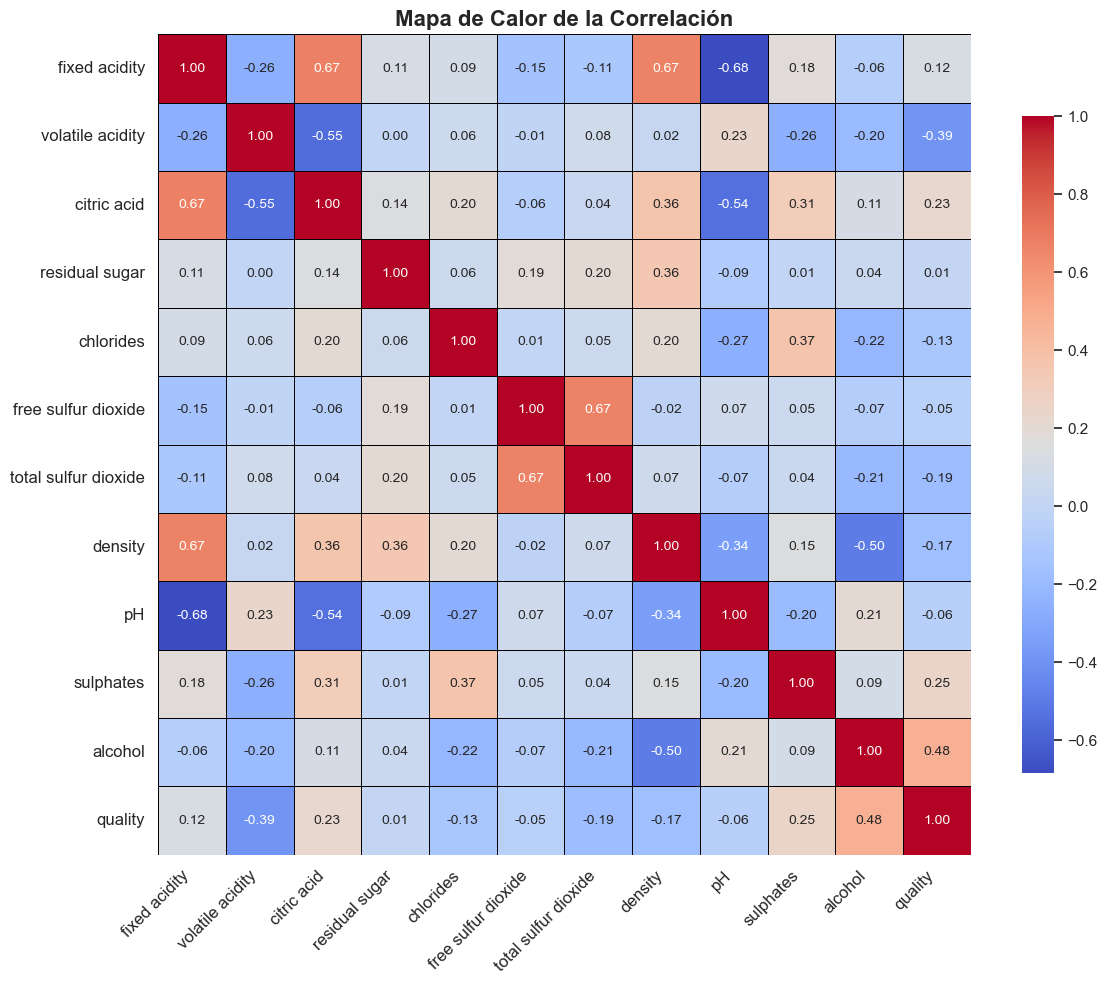

In [59]:
# Ajustar el estilo
sns.set(style="whitegrid")

# Crear figura para el gráfico
plt.figure(figsize=(12, 10))  # Tamaño del gráfico

# Calcular la matriz de correlación
corr = df.corr()

# Crear el mapa de calor
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black', cbar_kws={'shrink': .8}, annot_kws={"size": 10})

# Título
plt.title('Mapa de Calor de la Correlación', fontweight='bold', fontsize=16)

# Ajustar los ejes
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Ajustar el diseño
plt.tight_layout()

# Mostrar gráfico
plt.show()
